# Course 1 Task 2 Notebook

## POA Step 3: In-Depth Analysis: Machine Learning: Train/Test Split Method

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree

%matplotlib inline

In [2]:
data = pd.read_csv("Demographic_Data.csv")

In [3]:
# original dataset (preprocessed) -- needs to be preprocessed

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
data = data.drop_duplicates()

data.duplicated().value_counts()

False    79979
dtype: int64

# Using "region" as the depedent variable

In [5]:
# only the independent variables are features, so we have to utilize "in-store", "age", "items" and "amount"

# the "region" column is a depedent variable

# features

X = data.iloc[:,0:4]
print("Summary of feature sample")
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [6]:
# dependent variable

# what the method is trying to predict (the values of this variable)

y = data["region"]

In [7]:
# Train/Test Split

# creation of two metric values which will be compared --- important for the comparision of "train loss" and "test loss" 

# loss = accuracy score (%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [8]:
#Modeling (Classification)

# the method (Decision Tree Classifier) which will be used to parse and predict the test depedent variable values from 
# the test features values 
region_DTC = DecisionTreeClassifier(max_depth=10)

# the constructed model

region_model_1 = region_DTC.fit(X_train, y_train)

In [9]:
# what the method predicts the test depedent variable to be based on the test indepedent variables 

preds_region_model_1 = region_model_1.predict(X_test)

In [10]:
region_model_1_cr = classification_report(y_test, preds_region_model_1, zero_division=True)

# print(classification_report(y_test, preds_region_model_1), zero_division=True)

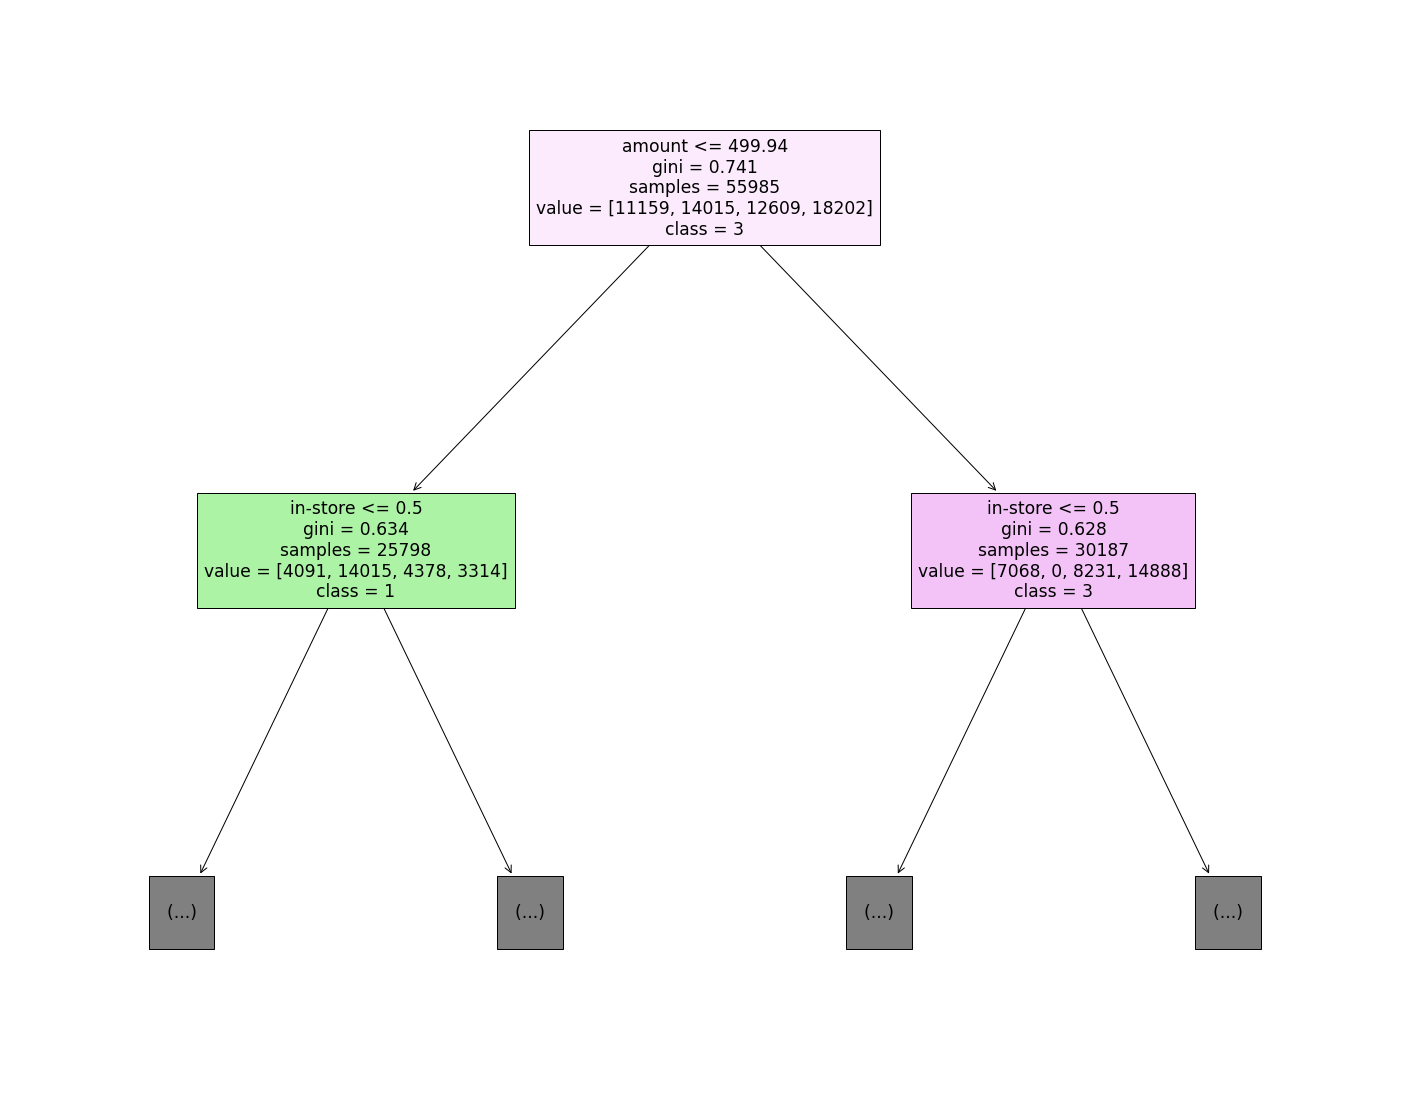

In [11]:
# creates a visualization of the Decision Tree 

# while this visualization may not be shared with end-users, it will be used to create a "story" which the Data Analyst
# must speak of

fig = plt.figure(figsize=(25,20))

tree = plot_tree(region_model_1, feature_names=X.columns, class_names=["0", "1", "2", "3"], filled=True, max_depth=1)

### Model: RandomForestClassifier

In [12]:
region_RFC = RandomForestClassifier(n_estimators=10, max_depth=4)

region_model_2 = region_RFC.fit(X_train, y_train)

preds_region_model_2 = region_model_2.predict(X_test)

region_model_2_cr = classification_report(y_test, preds_region_model_2, zero_division=True)

# print(classification_report(y_test, preds_region_model_2), zero_division=True)

### Model: GradientBoostingClassifier

In [13]:
region_GBC = GradientBoostingClassifier(max_features=4)

region_model_3 = region_GBC.fit(X_train, y_train)

preds_region_model_3 = region_model_3.predict(X_test)

region_model_3_cr = classification_report(y_test, preds_region_model_3, zero_division=True)

# print(classification_report(y_test, preds_region_model_3), zero_division=True)

# Using "age" as the depedent variable

In [14]:
# must readjust the "feature space" so as to avoid over-fitting and incorrect Model development(s)

# removes the dependent variable ("age") from the training data (indepedent variables/features)
 
X = data.iloc[:,[0, 2, 3, 4]]
X.head()

,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [15]:
# validating code --- prior to discretizing the "age" variable / adding a new variable to the dataset

# data.isnull().sum()

In [16]:
# discretizing a continous numerical variable (like "age" or "amount") makes that modified variable into a categorical discrete variable 
# this is necessary for Classification models

# this is how the depedent variable is created (through discretization)

In [17]:
# this code WILL NOT work -- returns a "NaN" error message when the model is being created (the model cannot be created)

# this is because of how the "bins" parameter is designed: it necessarily creates null values because the current configuration
# does not properly capture the range of "age" values from the data

# data["age_bin"] = pd.cut(x=data["age"], bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4, 5, 6])

In [18]:
# BINS = 7

# using this version of the code will result in a slightly different classification report due to how the "bins" parameter is
# changed

# data["age_bin"] = pd.cut(x=data["age"], bins=7, labels=[0, 1, 2, 3, 4, 5, 6])


In [19]:
# BINS = 8

# lowest accuracy score (>20%)

# bins and labels have been modified to properly capture the full range of age values (18 to 85)

# discretizes the "age" variable to change it from continous numerical to categorical discrete 

# data["age_bin"] = pd.cut(data["age"], bins=8, labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"])

In [20]:
# BINS = 3

# highest accuracy score (~43%)

data["age_bin"] = pd.cut(data["age"], bins=3, labels=["18-30", "31-60", "61-90"])

In [21]:
# BINS = 5

# data["age_bin"] = pd.cut(data["age"], bins=5, labels=["15-30", "30-45", "45-60","60-75", "75-90"])

In [22]:
#this can be ignored -- just some EDA stuff

# data[["age", "age_bin", "age_bracket"]].groupby("age_bin").count()

In [23]:
y = data["age_bin"]

In [24]:
# Train/Test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [25]:
# Modeling (Classification)

age_DTC = DecisionTreeClassifier(max_depth=4)

age_model_1 = age_DTC.fit(X_train, y_train)

# Predictions

preds_age_model_1 = age_model_1.predict(X_test)

# Creates and then displays the Classification Report for the given Model

age_model_1_cr = classification_report(y_test, preds_age_model_1, zero_division=True)

# print(classification_report(y_test, preds_age_1, zero_division=True))

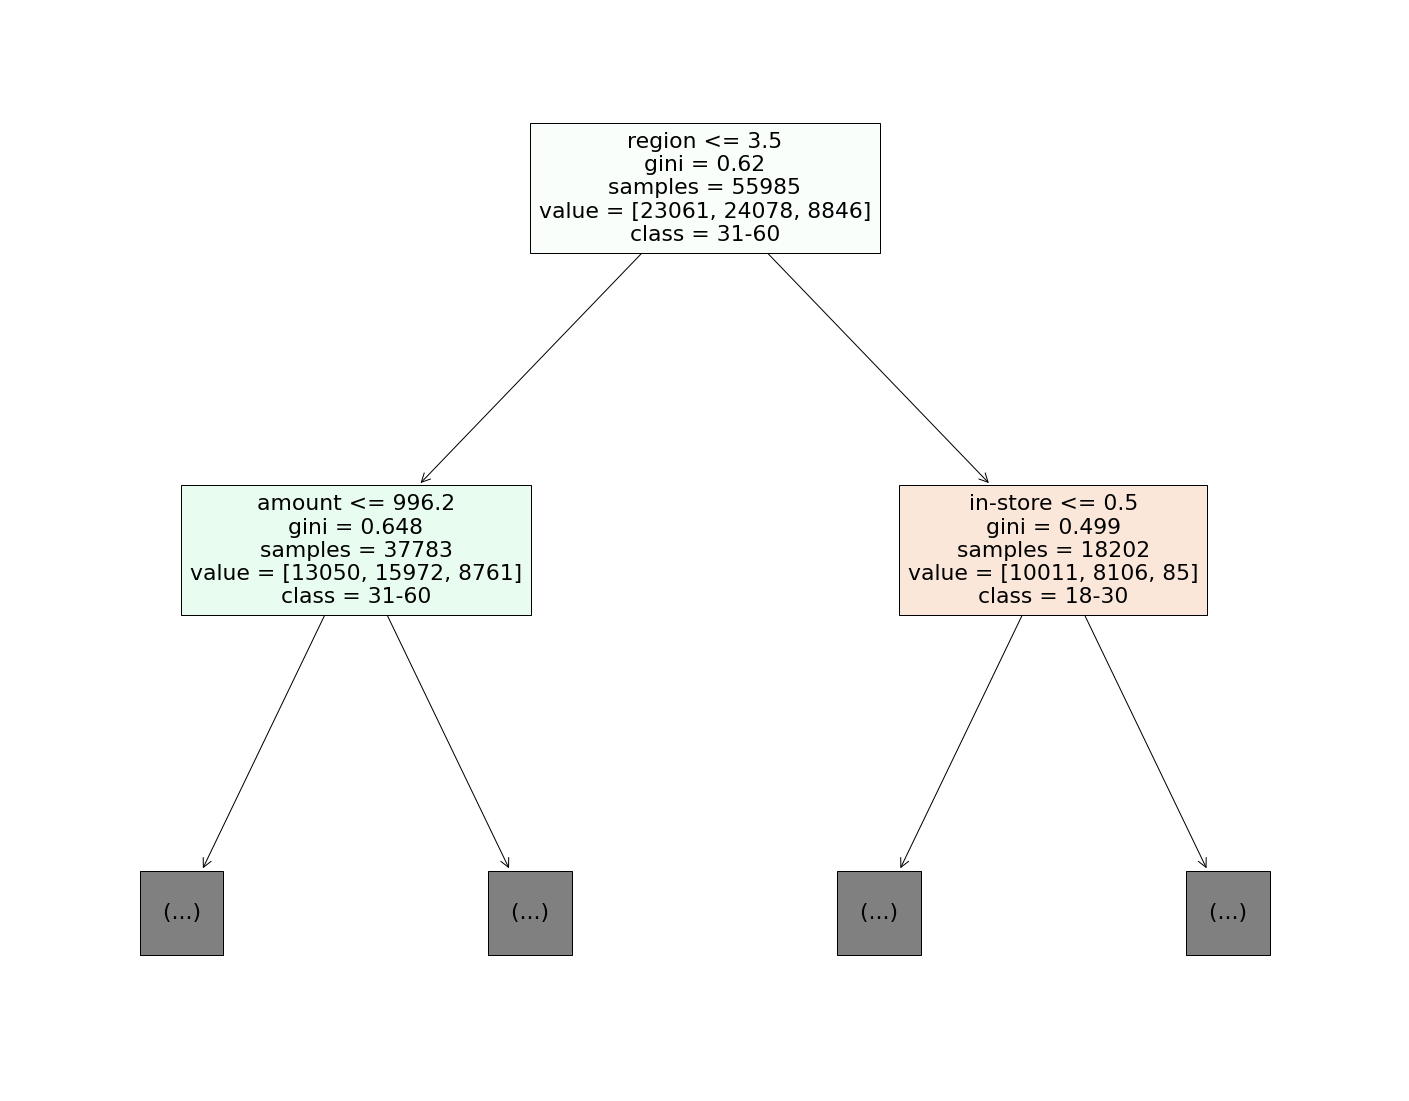

In [26]:
# # Creates and then displays a plot of the Decision Tree

# # note: it is not possible to display a plot when the model is RandomForestClassifier

# # note: it is possible to display a plot when the model is GradientBoostingClassifier, but only the last iteration (the final tree)

fig = plt.figure(figsize=(25,20))

tree = plot_tree(age_model_1, feature_names=X.columns, class_names=["18-30", "31-60", "61-90"], filled=True, max_depth=1)

### Model: RandomForestClassifier 

In [27]:
age_RFC = RandomForestClassifier(n_estimators=10, max_depth=10)

age_model_2 = age_RFC.fit(X_train, y_train)

preds_age_model_2 = age_model_2.predict(X_test)

age_model_2_cr = classification_report(y_test, preds_age_model_2, zero_division=True)

# print(classification_report(y_test, preds_age_model_2, zero_division=True))

### Model: GradientBoosting Classifier

In [28]:
age_GBC = GradientBoostingClassifier(n_estimators=10, max_depth=10)

age_model_3 = age_GBC.fit(X_train, y_train)

preds_age_model_3 = age_model_3.predict(X_test)

age_model_3_cr = classification_report(y_test, preds_age_model_3, zero_division=True)

# print(classification_report(y_test, preds_age_model_3, zero_division=True))

# Using "amount" as a depedent variable

In [29]:
# it is fundamental that the "feature space" be adjusted (modified and re-instantiated)
# when new dependent variables are being used for model development

# if the training data (X) variable is not adjusted, this will lead to classification reports that show 100% accuracy
# which is both practically impossible and incorrect 

# this problem happens because the model is using the same training data it has already parsed, which means that it will
# simply "memorize" the data, leading to an over-fit problem

# Over-fitting generally should not happen in models that deal with Classification, as the depedent variables are
# always categorical and discrete. 

# Over-fitting generally is more likely to occur in models that deal with Regression, as the dependent variables are
# always continuous and numeric.

X = data.iloc[:,[0, 1, 2, 4]]
X.head()

,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [30]:
# discretizes the "amount" variable which turns it from a continuous numerical variable to a categorical discrete variable

# 

# data["amount_bin"] = pd.cut(data["amount"], bins=10, labels=["$0-300", "$300-600", "$600-900", "$900-1200", "$1200-1500", "$1500-1800", "$1800-2100", "$2100-2400", "$2400-2700", "$2700-3000"])

# y = data["amount_bin"]

In [31]:
data["amount_bin"] = pd.cut(data["amount"], bins=3, labels=["$0-1000", "$1000-2000", "$2000-3000"])

# changing the bin parameter affects the accuracy scores of the model

y = data["amount_bin"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [33]:
amount_DTC = DecisionTreeClassifier(max_depth=10)

amount_model_1 = amount_DTC.fit(X_train, y_train)

preds_amount_model_1 = amount_model_1.predict(X_test)

amount_model_1_cr = classification_report(y_test, preds_amount_model_1, zero_division=True)

# print(classification_report(y_test, preds_amount_model_1, zero_division=True))


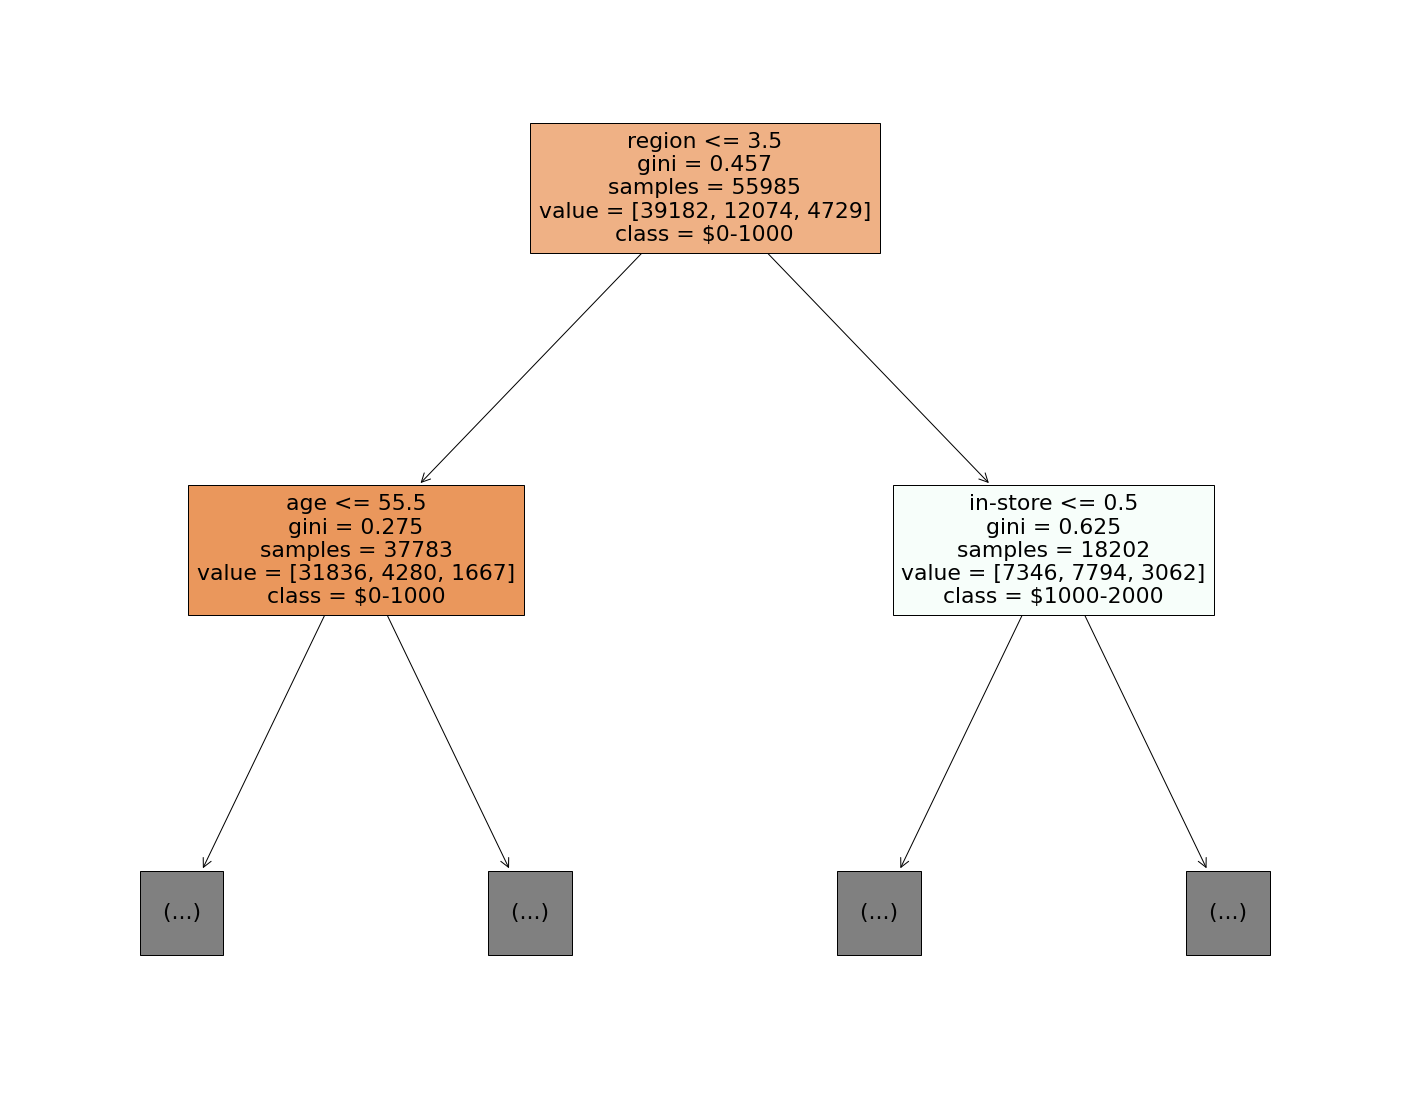

In [34]:
fig = plt.figure(figsize=(25,20))

tree = plot_tree(amount_model_1, feature_names=X.columns, class_names=["$0-1000", "$1000-2000", "$2000-3000"], filled=True, max_depth=1)

### Model: RandomForestClassifier

In [35]:
amount_RFC = RandomForestClassifier(n_estimators=5, max_depth=10)

amount_model_2 = amount_RFC.fit(X_train, y_train)

preds_amount_model_2 = amount_model_2.predict(X_test)

amount_model_2_cr = classification_report(y_test, preds_amount_model_2, zero_division=True)

# print(classification_report(y_test, preds_amount_model_2, zero_division=True))


### Model: GradientBoostingClassifier

In [36]:
amount_GBC = GradientBoostingClassifier()

amount_model_3 = amount_GBC.fit(X_train, y_train)

preds_amount_model_3 = amount_model_3.predict(X_test)

amount_model_3_cr = classification_report(y_test, preds_amount_model_3, zero_division=True)

# print(classification_report(y_test, preds_amount_model_3, zero_division=True))


# Using "items" as the depedent variable 

In [37]:
# have to readjust the "feature space" to avoid over-fitting and incorrect model development(s)

# here we remove the "items" variable so that it is the dependent variable

X = data.iloc[:, [0, 1, 3, 4]]
X.head()

,in-store,age,amount,region
0,0,37,281.03,2
1,0,35,219.51,2
2,1,45,1525.70,4
3,1,46,715.25,3
4,1,33,1937.50,1


In [38]:
# there are a range of 9 items, starting from 0 and ending in 8, hence the bins value and labels values 

# data["items_bin"] = pd.cut(data["items"], bins=9, labels=["0", "1", "2", "3", "4", "5", "6", "7", "8"])

# y = data["items_bin"]

In [39]:
data["items_bin"] = pd.cut(data["items"], bins=4, labels=["0-2", "2-4", "4-6", "6-8"])

y = data["items_bin"]

In [40]:
# data["items_bin"] = pd.cut(data["items"], bins=2, labels=["0-4", "4-8"])

# y = data["items_bin"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [42]:
items_DTC = DecisionTreeClassifier(max_depth=10)

items_model_1 = items_DTC.fit(X_train, y_train)

preds_items_model_1 = items_model_1.predict(X_test)

items_model_1_cr = classification_report(y_test, preds_items_model_1, zero_division=True)

# print(classification_report(y_test, preds_items_model_1, zero_division=True))

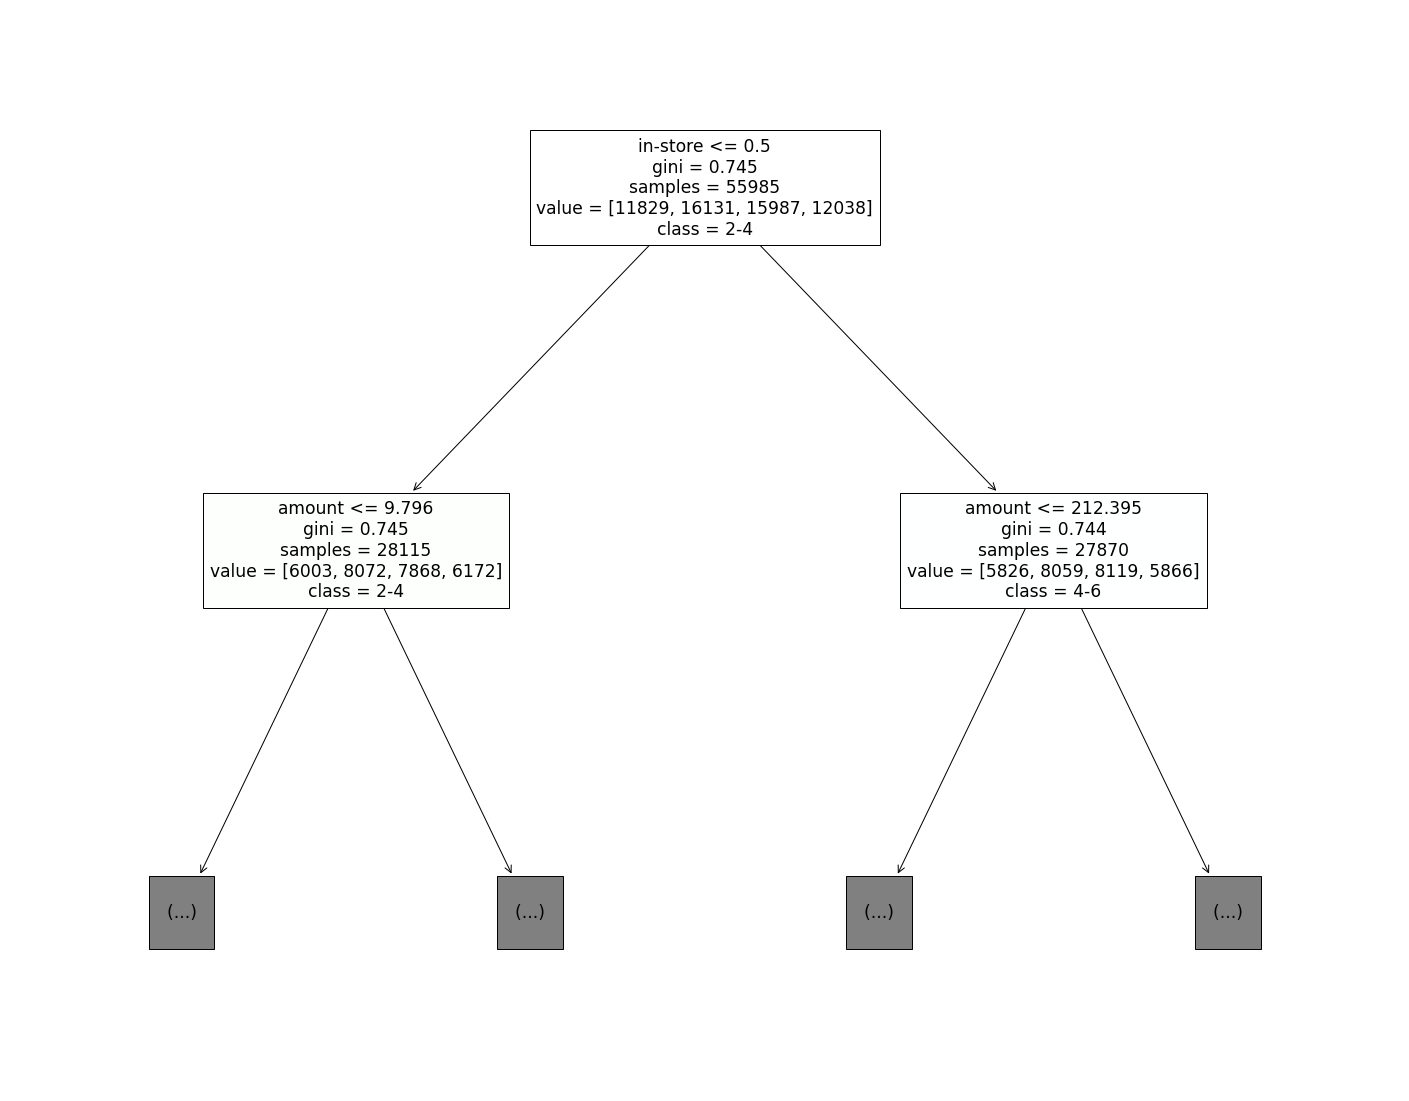

In [43]:
fig = plt.figure(figsize=(25,20))

tree = plot_tree(items_model_1, feature_names=X.columns, class_names=["0-2", "2-4", "4-6", "6-8"], filled=True, max_depth=1)

### Model: RandomForestClassifier

In [44]:
items_RFC = RandomForestClassifier(n_estimators=5, max_depth=10)

items_model_2 = items_RFC.fit(X_train, y_train)

preds_items_model_2 = items_model_2.predict(X_test)

items_model_2_cr = classification_report(y_test, preds_items_model_2, zero_division=True)

# print(classification_report(y_test, preds_items_model_2, zero_division=True))

### Model: GradientBoostingClassifier

In [45]:
items_GBC = GradientBoostingClassifier(n_estimators=5, max_depth=10)

items_model_3 = items_GBC.fit(X_train, y_train)

preds_items_model_3 = items_model_3.predict(X_test)

items_model_3_cr = classification_report(y_test, preds_items_model_3, zero_division=True)

# print(classification_report(y_test, preds_items_model_3, zero_division=True))

## Using "in-store" as the dependent variable

In [46]:
X = data.iloc[:,[1, 2, 3, 4]]
X.head()

,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [47]:
y = data["in-store"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model: DecisionTreeClassifier

In [49]:
in_store_DTC = DecisionTreeClassifier()

in_store_model_1 = in_store_DTC.fit(X_train, y_train)

preds_in_store_model_1 = in_store_model_1.predict(X_test)

in_store_model_1_cr = classification_report(y_test, preds_in_store_model_1, zero_division=True)

# print(classification_report(y_test, preds_in_store_model_1, zero_division=True))

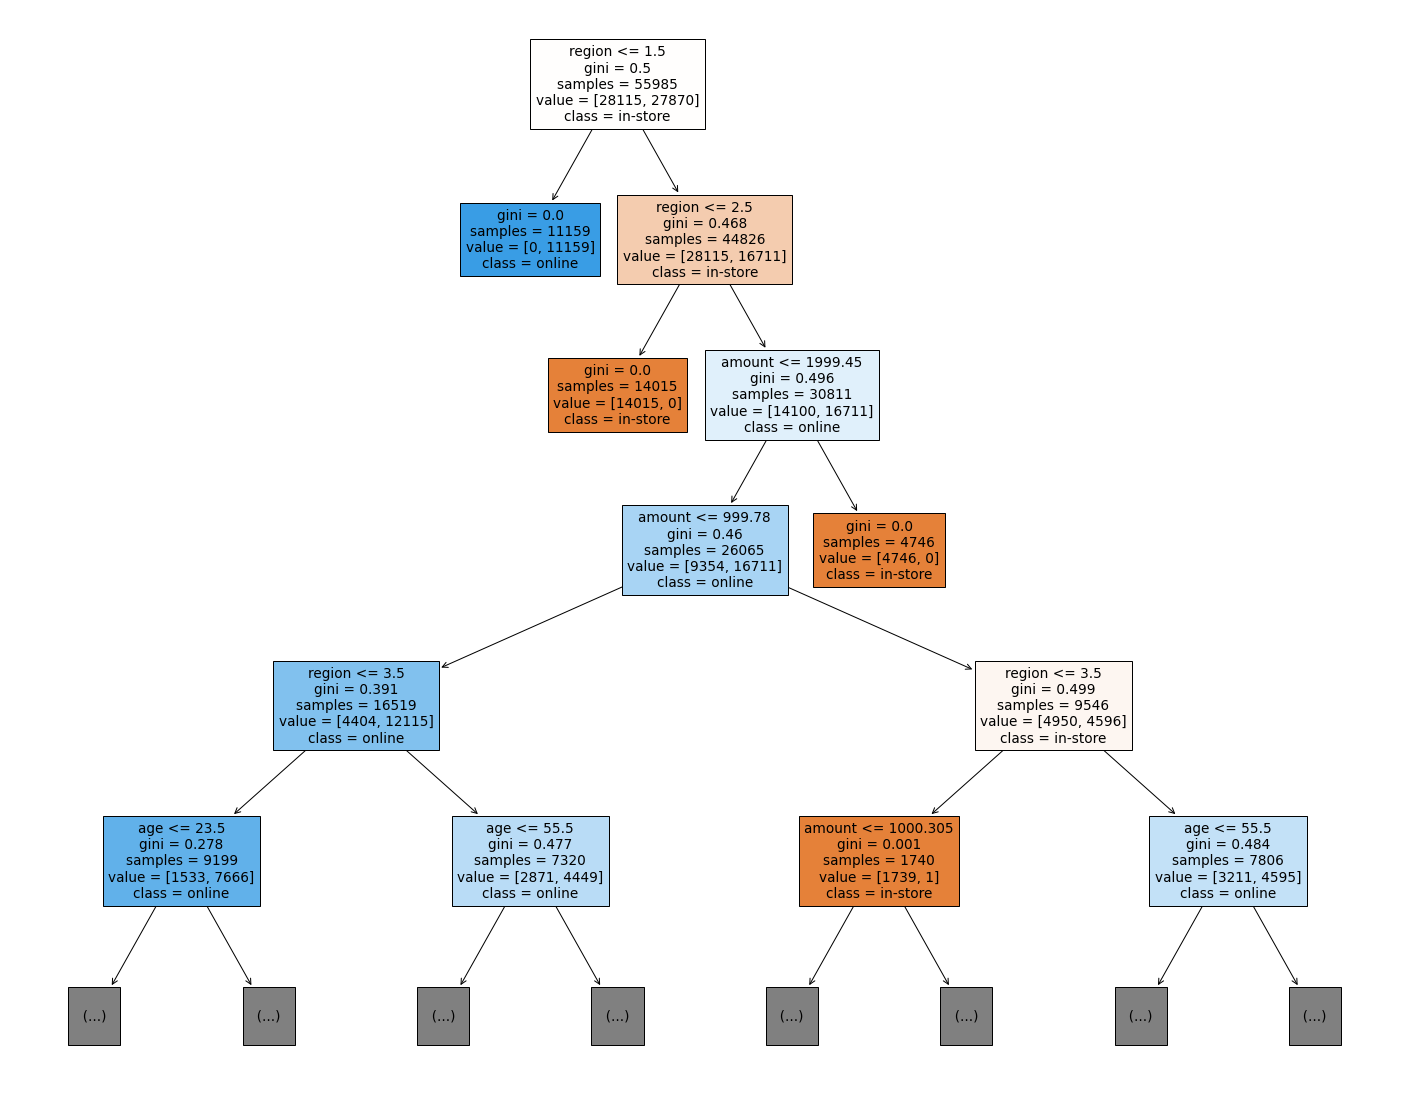

In [50]:
fig = plt.figure(figsize=(25,20))

tree = plot_tree(in_store_model_1, feature_names=X.columns, class_names=["in-store", "online"], filled=True, max_depth=5)

### Model: RandomForestClassifier

In [51]:
in_store_RFC = RandomForestClassifier(n_estimators=10, max_depth=5)

in_store_model_2 = in_store_DTC.fit(X_train, y_train)

preds_in_store_model_2 = in_store_model_2.predict(X_test)

in_store_model_2_cr = classification_report(y_test, preds_in_store_model_2, zero_division=True)

# print(classification_report(y_test, preds_in_store_model_2, zero_division=True))

### Model: GradientBoostingClassifier

In [52]:
in_store_GBC = GradientBoostingClassifier()

in_store_model_3 = in_store_GBC.fit(X_train, y_train)

preds_in_store_model_3 = in_store_model_3.predict(X_test)

in_store_model_3_cr = classification_report(y_test, preds_in_store_model_3, zero_division=True)

# print(classification_report(y_test, preds_in_store_model_3, zero_division=True))

## Classification Reports (for all dependent variables and their respective models)

In [53]:
crs = ["Region: DecisionTreeClassifier \n", region_model_1_cr, 
       "Region: RandomForestClassifier \n", region_model_2_cr, 
       "Region: GradientBoostingClassifier \n", region_model_3_cr,
       "-----------------------------------------------------",
       "-----------------------------------------------------",
       "Age: DecisionTreeClassifier \n", age_model_1_cr, 
       "Age: RandomForestClassifier \n", age_model_2_cr, 
       "Age: GradientBoostingClassifier \n", age_model_3_cr,
       "-----------------------------------------------------",
       "-----------------------------------------------------",
       "Amount: DecisionTreeClassifier \n", amount_model_1_cr, 
       "Amount: RandomForestClassifier \n", amount_model_2_cr, 
       "Amount: GradientBoostingClassifier \n", amount_model_3_cr,
       "-----------------------------------------------------",
       "-----------------------------------------------------",
       "Items: DecisionTreeClassifier \n", items_model_1_cr, 
       "Items: RandomForestClassifier \n", items_model_2_cr, 
       "Items: GradientBoostingClassifier \n", items_model_3_cr,
       "-----------------------------------------------------",
       "-----------------------------------------------------",
       "In-store: DecisionTreeClassifier \n", in_store_model_1_cr, 
       "In-store: RandomForestClassifier \n", in_store_model_2_cr, 
       "In-store: GradientBoostingClassifier \n", in_store_model_3_cr,
      ]
     

for i in crs:
    print(i)

Region: DecisionTreeClassifier 

              precision    recall  f1-score   support

           1       0.41      0.53      0.46      4838
           2       0.90      1.00      0.95      5979
           3       0.51      0.23      0.32      5391
           4       0.65      0.72      0.68      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.63      0.64      0.62     23994

Region: RandomForestClassifier 

              precision    recall  f1-score   support

           1       0.40      0.55      0.46      4838
           2       0.89      1.00      0.94      5979
           3       0.54      0.22      0.31      5391
           4       0.65      0.71      0.68      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.63      0.64      0.62     23994

Region: GradientBoostingClassifier 

              precision    

## POA Step 4: In-Depth Analysis: Machine Learning: Cross Validation Method

In [54]:
algos_Class = []

region_grp_1 = ("Region: DecisionTreeClassifier", region_model_1) 
region_grp_2 = ("Region: RandomForestClassifier", region_model_2) 
region_grp_3 = ("Region: GradientBoostingClassifier", region_model_3)

age_grp_1 = ("Age: DecisionTreeClassifier", age_model_1) 
age_grp_2 = ("Age: RandomForestClassifier", age_model_2) 
age_grp_3 = ("Age: GradientBoostingClassifier", age_model_3)

amount_grp_1 = ("Amount: DecisionTreeClassifier", amount_model_1) 
amount_grp_2 = ("Amount: RandomForestClassifier", amount_model_2) 
amount_grp_3 = ("Amount: GradientBoostingClassifier", amount_model_3)

items_grp_1 = ("Items: DecisionTreeClassifier", items_model_1) 
items_grp_2 = ("Items: RandomForestClassifier", items_model_2) 
items_grp_3 = ("Items: GradientBoostingClassifier", items_model_3)

in_store_grp_1 = ("In-store: DecisionTreeClassifier", in_store_model_1)
in_store_grp_2 = ("In-store: RandomForestClassifier", in_store_model_2)
in_store_grp_3 = ("In-store: GradientBoostingClassifier", in_store_model_3)


# algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
# algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

algos_Class.append(region_grp_1)
algos_Class.append(region_grp_2)
algos_Class.append(region_grp_3)

algos_Class.append(age_grp_1)
algos_Class.append(age_grp_2)
algos_Class.append(age_grp_3)

algos_Class.append(amount_grp_1)
algos_Class.append(amount_grp_2)
algos_Class.append(amount_grp_3)

algos_Class.append(items_grp_1)
algos_Class.append(items_grp_2)
algos_Class.append(items_grp_3)

algos_Class.append(in_store_grp_1)
algos_Class.append(in_store_grp_2)
algos_Class.append(in_store_grp_3)

#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
     print(names[i],results[i].mean(), "\n") # shows the average score (based on cv parameter)
#     print(names[i], results[i], "\n") # shows the scores for each fold (based on cv parameter)

# the comment below refers to the example code from the POA section    
    
# RFC: 0.132
# DTC: 0.131

# Both models perform basically the same, however the Random Forest Classifier 
# performed slightly better, so I would choose it.

Region: DecisionTreeClassifier 0.8871953762475654 

Region: RandomForestClassifier 0.8453968977258756 

Region: GradientBoostingClassifier 0.8873454123499366 

Age: DecisionTreeClassifier 0.8399829617181481 

Age: RandomForestClassifier 0.8873079109456272 

Age: GradientBoostingClassifier 0.8873579220417468 

Amount: DecisionTreeClassifier 0.8871953762475654 

Amount: RandomForestClassifier 0.8874454486122375 

Amount: GradientBoostingClassifier 0.8873454123499366 

Items: DecisionTreeClassifier 0.8871953762475654 

Items: RandomForestClassifier 0.8871703770310333 

Items: GradientBoostingClassifier 0.8872453915647035 

In-store: DecisionTreeClassifier 0.8451468459972941 

In-store: RandomForestClassifier 0.845246865844523 

In-store: GradientBoostingClassifier 0.8873454123499366 



In [55]:
# displays the count of true positives, false positives, true negatives and false negatives
# given a particular model

# from sklearn.metrics import confusion_matrix

# preds_all = [preds_region_model_1,
#              preds_region_model_2,
#              preds_region_model_3,
#              preds_age_model_1,
#              preds_age_model_2,
#              preds_age_model_3,
#              preds_amount_model_1,
#              preds_amount_model_2,
#              preds_amount_model_3,
#              preds_items_model_1,
#              preds_items_model_2,
#              preds_items_model_3,
#              preds_in_store_model_1,
#              preds_in_store_model_2,
#              preds_in_store_model_3]

# for i in range(len(preds_all)):
#     print(confusion_matrix(y_test.astype("str"), preds_all[i].astype("str")), "\n")


In [56]:
# EDA

# displays the age groups associated with each region in the form of percentages 

# the West region (4) is clearly represented by young people (0-30, which really starts at 18)

# the South region (2) is clearly represented by old people (31-90)

data["age_bin"].groupby(data["region"]).value_counts(normalize=True) * 100

region       
1       18-30    44.789648
        31-60    42.289179
        61-90    12.921173
2       61-90    39.776933
        31-60    38.416525
        18-30    21.806542
3       31-60    46.533333
        18-30    39.338889
        61-90    14.127778
4       18-30    54.944590
        31-60    44.562875
        61-90     0.492535
Name: age_bin, dtype: float64

In [57]:
# data.corr()

In [58]:
# 0 = online purchase
# 1 = in-store purchase


data["age_bin"].groupby(data["in-store"]).value_counts(normalize=True) * 100

in-store       
0         31-60    43.594488
          18-30    35.989897
          61-90    20.415614
1         18-30    46.244061
          31-60    42.435609
          61-90    11.320330
Name: age_bin, dtype: float64

In [59]:
# data.cov()